# II. SVM on MNIST dataset

Deal with data

In [1]:
import numpy as np
import csv

In [2]:
# load data as array

def load_x_file(data):
    x_data=[]
    with open(data) as cvsfile:
        rows=csv.reader(cvsfile)
        for row in rows:
            x_data.append([float(v) for v in row])
    x_data=np.asarray(x_data,dtype='float')
    return x_data

def load_y_file(data):
    y_data=[]
    with open(data) as csvfile:
        rows=csv.reader(csvfile)
        for row in rows:
            y_data.append(int(row[0]))
    y_data=np.asarray(y_data,dtype=int)
    return y_data

x_train = load_x_file('X_train.csv')
y_train = load_y_file('Y_train.csv')
x_test = load_x_file('X_test.csv')
y_test = load_y_file('Y_test.csv')

In [3]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(5000, 784)
(5000,)
(2500, 784)
(2500,)


# Part1: Use different kernel functions (linear, polynomial, and RBF kernels) and have comparison between their performance.

libsvm.svmutil: 

reference: https://www.csie.ntu.edu.tw/~cjlin/libsvm/

t kernel_type : set type of kernel function (default 2)

	0 -- linear: u'*v
    
	1 -- polynomial: (gamma*u'*v + coef0)^degree
    
	2 -- radial basis function: exp(-gamma*|u-v|^2)
    
	3 -- sigmoid: tanh(gamma*u'*v + coef0)

In [4]:
from libsvm.svmutil import *

# linear
print('Linear kernel:')
options = '-t 0'
linear = svm_train(y_train, x_train, options)
l_label, l_acc, l_vals = svm_predict(y_test, x_test, linear)
#print('The accuracy of linear kernel:', l_acc[0])

# polynomial
print('Polynomial kernel:')
options = '-t 1'
poly = svm_train(y_train, x_train, options)
p_label, p_acc, p_vals = svm_predict(y_test, x_test, poly)
#print('The accuracy of polynomial kernel:', p_acc[0])

# RBF
print('RBF kernel:')
options = '-t 2'
rbf = svm_train(y_train, x_train, options)
r_label, r_acc, r_vals = svm_predict(y_test, x_test, rbf)
#print('The accuracy of RBF kernel:', r_acc[0])

Linear kernel:
Accuracy = 95.08% (2377/2500) (classification)
Polynomial kernel:
Accuracy = 34.68% (867/2500) (classification)
RBF kernel:
Accuracy = 95.32% (2383/2500) (classification)


# Part2: Grid search

cross validation: use -v

reference: https://github.com/cjlin1/libsvm/tree/master/python

In [15]:
# grid sreach function for rbf

def grid_search_rbf(C, gamma, x_train, y_train):
    grid = np.zeros((len(C), len(gamma)))
    for i in range(len(C)):
        for j in range(len(gamma)):
            options = '-t 2 -v 3 -c {} -g {}'.format(C[i], gamma[j])
            acc = svm_train(y_train, x_train, options)
            grid[i, j] = acc
    return grid

In [16]:
# set C and gamma

gamma= C =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [17]:
# main

final_list = grid_search(C, gamma, x_train, y_train)

Cross Validation Accuracy = 79.44%
Cross Validation Accuracy = 80.78%
Cross Validation Accuracy = 89.82%
Cross Validation Accuracy = 49.18%
Cross Validation Accuracy = 20.52%
Cross Validation Accuracy = 79.08%
Cross Validation Accuracy = 35.66%
Cross Validation Accuracy = 20%
Cross Validation Accuracy = 79.68%
Cross Validation Accuracy = 81.02%
Cross Validation Accuracy = 89.92%
Cross Validation Accuracy = 48.48%
Cross Validation Accuracy = 20.52%
Cross Validation Accuracy = 78.94%
Cross Validation Accuracy = 35.82%
Cross Validation Accuracy = 20%
Cross Validation Accuracy = 79.46%
Cross Validation Accuracy = 81.04%
Cross Validation Accuracy = 91.8%
Cross Validation Accuracy = 50.44%
Cross Validation Accuracy = 20.58%
Cross Validation Accuracy = 78.92%
Cross Validation Accuracy = 35.86%
Cross Validation Accuracy = 20%
Cross Validation Accuracy = 79.62%
Cross Validation Accuracy = 91.82%
Cross Validation Accuracy = 96.16%
Cross Validation Accuracy = 53.94%
Cross Validation Accuracy = 20

In [37]:
import seaborn as sns
import matplotlib.pylab as plt

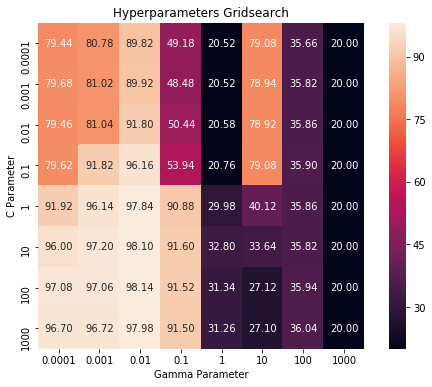

In [19]:
# plot the heatmap

f, ax = plt.subplots(figsize=(9, 6))
fig = sns.heatmap(final_list, annot=True, square=True, ax=ax, fmt =".2f" )
fig.set_xticklabels(gamma)
fig.set_yticklabels(C)
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("Gamma Parameter")
plt.ylabel("C Parameter")
fig.set_title('Hyperparameters Gridsearch')
plt.show()

best hyperparamter condition for rbf is: {gamma: 0.01, C: 100}

In [38]:
C =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# grid sreach function for linear

def grid_search_linear(C ,x_train, y_train):
    grid = np.zeros(len(C))
    for i in range(len(C)):
        options = '-t 0 -v 3 -c {}'.format(C[i])
        acc = svm_train(y_train, x_train, options)
        grid[i] = acc
    return grid

# grid sreach function for polynomial

def grid_search_polynomial(C,x_train, y_train):
    grid = np.zeros(len(C))
    for i in range(len(C)):
        options = '-t 1 -v 3 -c {}'.format(C[i])
        acc = svm_train(y_train, x_train, options)
        grid[i] = acc
    return grid

In [39]:
linear_grid = grid_search_linear(C ,x_train, y_train)
poly_grid = grid_search_polynomial(C,x_train, y_train)

Cross Validation Accuracy = 88.38%
Cross Validation Accuracy = 95.38%
Cross Validation Accuracy = 96.78%
Cross Validation Accuracy = 96.92%
Cross Validation Accuracy = 96.3%
Cross Validation Accuracy = 96.2%
Cross Validation Accuracy = 96.28%
Cross Validation Accuracy = 96.12%
Cross Validation Accuracy = 28.64%
Cross Validation Accuracy = 28.4%
Cross Validation Accuracy = 28.52%
Cross Validation Accuracy = 28.5%
Cross Validation Accuracy = 31.3%
Cross Validation Accuracy = 73.66%
Cross Validation Accuracy = 92.36%
Cross Validation Accuracy = 97.1%


In [40]:
linear_grid

array([88.38, 95.38, 96.78, 96.92, 96.3 , 96.2 , 96.28, 96.12])

In [41]:
poly_grid

array([28.64, 28.4 , 28.52, 28.5 , 31.3 , 73.66, 92.36, 97.1 ])

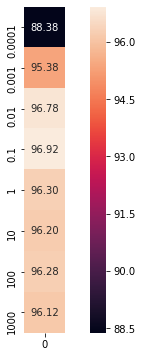

In [42]:
# plot the heatmap

linear_grid = np.reshape(linear_grid,(8,1))

f, ax = plt.subplots(figsize=(9, 6))
fig = sns.heatmap(linear_grid, annot=True, square=True, fmt =".2f")
fig.set_yticklabels(C)
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

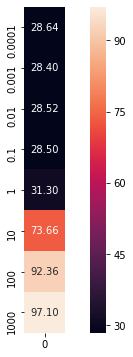

In [43]:
# plot the heatmap
poly_grid = np.reshape(poly_grid,(8,1))

f, ax = plt.subplots(figsize=(9, 6))
fig = sns.heatmap(poly_grid, annot=True, square=True, fmt =".2f")
fig.set_yticklabels(C)
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

# Part 3: Linear kernel + RBF kernel 

sqeuclidean：向量u和v之間的平方歐幾裏得距離。

In [30]:
# Use scipy.spatial.distance
# Set new kernel: liner + rbf kernel

from scipy.spatial.distance import cdist

def pre_kernel(x_data, x_data2, gamma):
    kernel_linear = x_data@x_data2.T
    kernel_rbf = np.exp(-gamma*cdist(x_data, x_data2, 'sqeuclidean'))
    kernel = kernel_linear + kernel_rbf
    kernel = np.hstack((np.arange(1, len(x_data)+1).reshape(-1, 1), kernel))
    return kernel

In [31]:
# main
# Use gamma = 0.01 
kernel_train = pre_kernel(x_train, x_train, 0.01)
problem = svm_problem(y_train, kernel_train, isKernel=True)
options = svm_parameter('-t 4')
model = svm_train(problem, options)
kernel_test = pre_kernel(x_test, x_train, 0.01)
label, acc, vals = svm_predict(y_test, kernel_test, model)
print('linear kernel + RBF kernel accuracy: {:.2f}%'.format(acc[0]))

Accuracy = 95.32% (2383/2500) (classification)
linear kernel + RBF kernel accuracy: 95.32%
